# Exploratory Data Analysis - Retail using Python

#### We will Visualize by conducitng EDA on the dataset through the use of scatter plots & heatmaps. After that, we will try to figure out the variables which are directly / indirectly related to Profit variable. 

## Read, Load & Understand the Data

In [1]:
#Load packages
# Read the file & display first 5 rows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt6
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

super_store = pd.read_csv("D:/ANCHIT/Python/SampleSuperstore.csv")
super_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
# Observe the size 
super_store.shape

(9994, 13)

In [3]:
# Check the total columns
cols = super_store.columns
cols

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
# Rows containing duplicate data
duplicate_rows_super_store = super_store[super_store.duplicated()]
print("number of duplicate rows: ", duplicate_rows_super_store.shape)

number of duplicate rows:  (17, 13)


In [5]:
# Dropping the duplicates 
super_store = super_store.drop_duplicates()

In [6]:
#Check the data
super_store.shape

(9977, 13)

In [7]:
# Check for any null values in the dataset
super_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Summarising the dataset for Statistical Inferences
super_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [9]:
# Check the type of each variable
super_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [10]:
# Rounding off the decimal values upto 2 decimal places for Sales & Profit 
# Copying on new variable of Sales_r & Profit_r respectively

super_store['Sales_r'] = round(super_store['Sales'], 2)
super_store['Profit_r'] = round(super_store['Profit'], 2)
cols = ['Sales', 'Profit']
super_store.drop(cols, axis=1, inplace=True)

In [11]:
# Below variable doesn't yield much value, hence dropping them
super_store.drop(['Postal Code'], axis=1, inplace=True)

In [12]:
#Renaming the column
super_store.rename(columns = {'Ship Mode':'Ship_Mode'}, inplace = True) 
super_store.head()

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Quantity,Discount,Sales_r,Profit_r
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,2,0.00,261.96,41.91
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,3,0.00,731.94,219.58
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,2,0.00,14.62,6.87
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,5,0.45,957.58,-383.03
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,2,0.20,22.37,2.52


## Outlier Detection

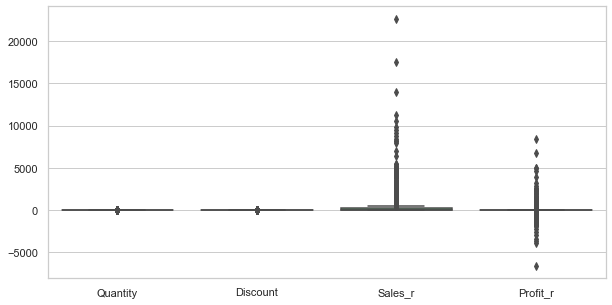

In [14]:
#Checking for outliers
plt.figure(figsize=[10,5])
sns.set(style="whitegrid")
ax = sns.boxplot(data=super_store)
plt.show()

### There are number of Outliers in Sales & Profit. Hence we need to remove them

In [15]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([.25, .75])
    IQR = Q3-Q1
    lower_range=Q1-(1.5+IQR)
    upper_range=Q3+(1.5+IQR)
    return lower_range, upper_range

lowsales, uppsales=remove_outlier(super_store['Sales_r'])
super_store['Sales_r'] = np.where(super_store['Sales_r'] > uppsales, uppsales, super_store['Sales_r'])
super_store['Sales_r'] = np.where(super_store['Sales_r'] < lowsales, lowsales, super_store['Sales_r'])

lowsales, uppsales=remove_outlier(super_store['Profit_r'])
super_store['Profit_r'] = np.where(super_store['Profit_r'] > uppsales, uppsales, super_store['Profit_r'])
super_store['Profit_r'] = np.where(super_store['Profit_r'] < lowsales, lowsales, super_store['Profit_r'])


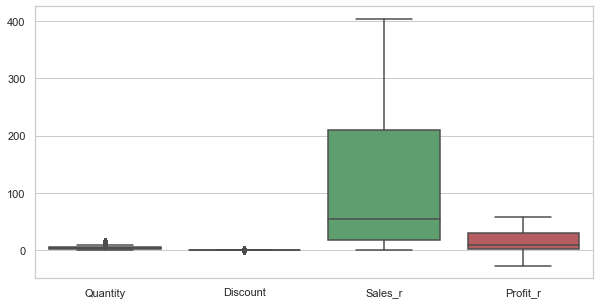

In [16]:
#Let's see if the outliers are removed or not
plt.figure(figsize=[10,5])
sns.set(style="whitegrid")
ax = sns.boxplot(data=super_store)
plt.show()

## Exploratory Data Analysis

#### Analysing the categorical variables

In [17]:
super_store.Category.value_counts(ascending=False)

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

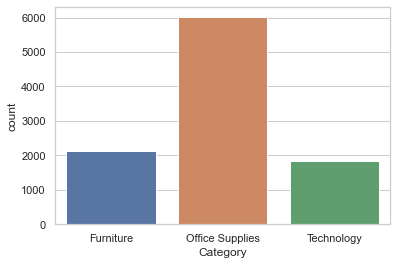

In [18]:
sns.countplot(x="Category", data=super_store)
plt.show()

In [19]:
super_store.Segment.value_counts(ascending=False)

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

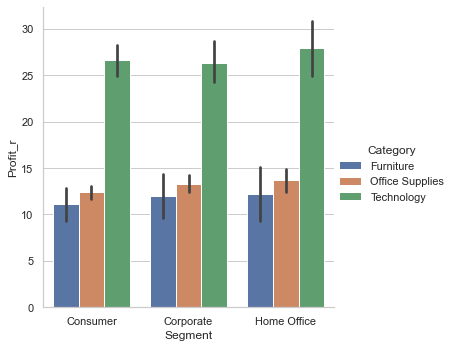

In [20]:
sns.catplot(x="Segment", y="Profit_r", kind='bar', hue='Category', data=super_store)

### Though the Category of Office Supplies was more in number, Technology category brought the highest profit in all the 3 Segments.

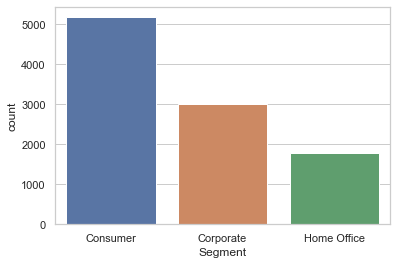

In [21]:
sns.countplot(x="Segment", data=super_store)
plt.show()

<Figure size 1080x576 with 0 Axes>

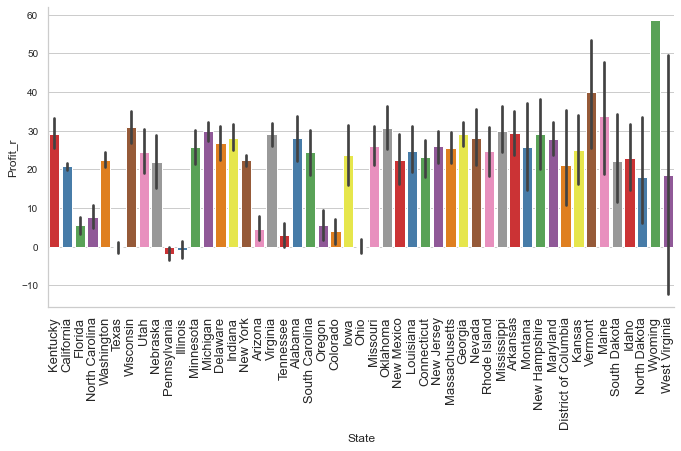

In [22]:
# CatPlot for State vs Profit
plt.figure(figsize=(15,8))
sns.catplot(x="State", y="Profit_r", data=super_store, kind='bar', height=5, aspect=2, palette="Set1")
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=10)
plt.show()

### We can see Wyoming & Vermont are among the highest Profit States alongwith others like Montana, Rhode Island, Indiana & Minnesota. However, states like Ohio, Texas, Pennsylvania & Illinois are making losses. 

In [23]:
super_store.Region.value_counts(ascending=False)

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

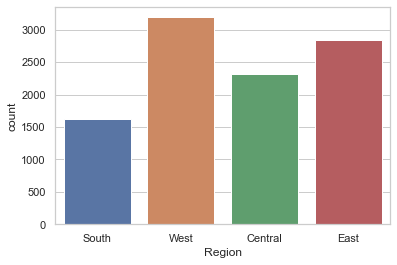

In [24]:
sns.countplot(x="Region", data=super_store)
plt.show()

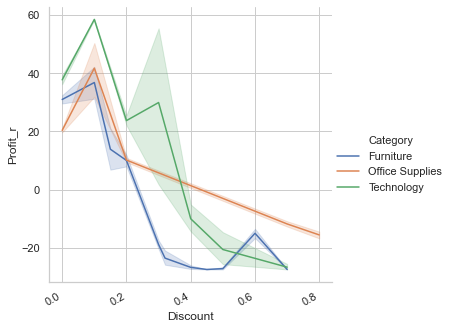

In [25]:
# Using Lineplot 
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="Discount", y="Profit_r", hue = 'Category', kind="line", data=super_store)
g.fig.autofmt_xdate()

#### We can observe that by giving Discount of 10 %, we can increase our Profit for all the 3 categories. However, giving discount of more than 10% will make our Profit margin decrease and it keeps on decreasing as we increase the discount.
#### Hence an ideal percant of 10% discount is feasible.

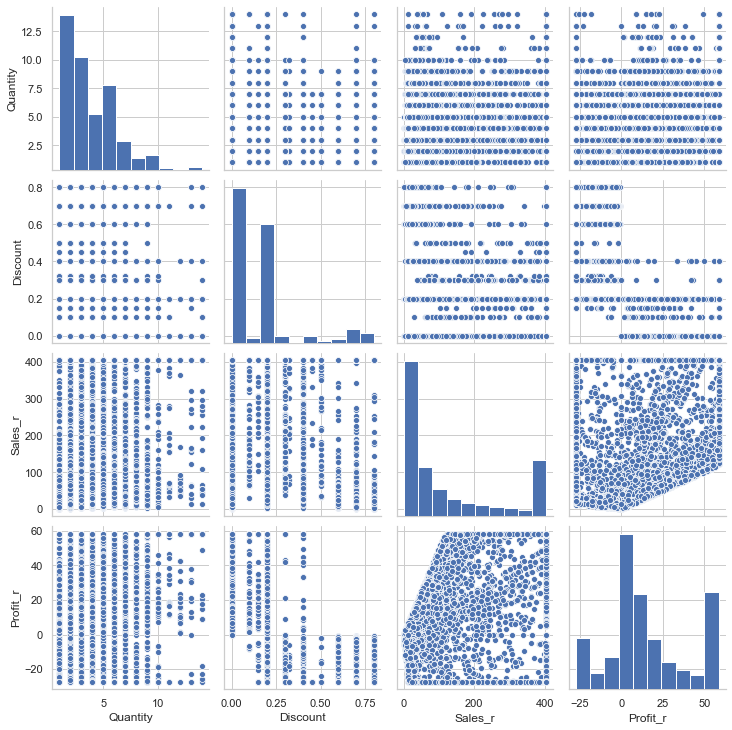

In [26]:
# Plotting all the variables 
sns.pairplot(super_store)
sns.set(style="whitegrid")

### As we can see above in the pairplot, there is not much a relation among the variables

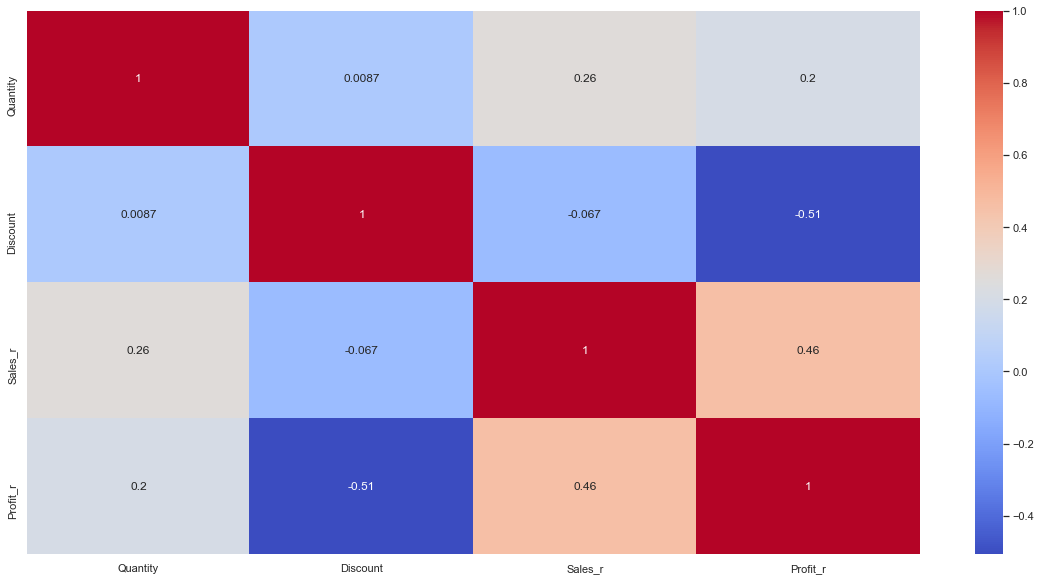

In [27]:
#plot correlation matrix
plt.figure(figsize=[20,10])
corr_mat = super_store.corr()
sns.set(style="whitegrid")
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)

#### As you can see there seems to be a positive correlation between Sales & Profit. Since it is positive, it means with increase in Sales, Profit increases. There is a negative correlation between Discount & Profit.
#### However, the correlations are not strong enough for any conclusion to make.

<Figure size 1080x576 with 0 Axes>

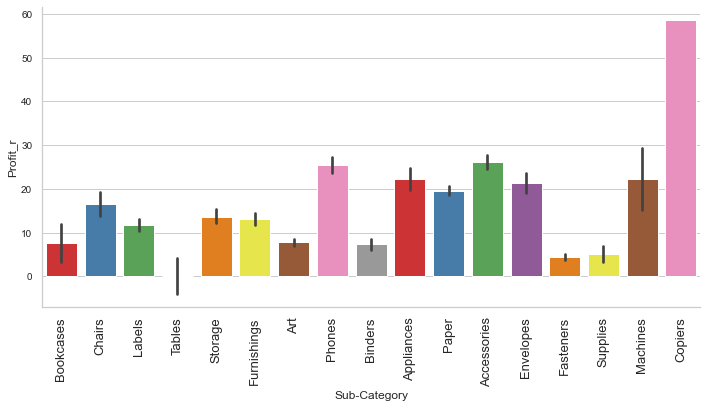

In [28]:
# CatPlot for Sub-Category vs Profit
plt.figure(figsize=(15,8))
sns.catplot(x="Sub-Category", y="Profit_r", data=super_store, kind='bar', height=5, aspect=2, palette="Set1")
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=10)
plt.show()

### In the above plot, we can see that Copiers made the highest profit among all the Sub-Category products. Other categories are Phones, Accesories, Appliances, Machines & Envelopes which had made considerable amount of profit.
### However, Tables made a neglible contribution in terms of profit. Other products like Fasteners & Supplies didn't made much of either.